## BBox Viewer
Upload an image, input bbox as `x1,y1,x2,y2`, then render.

In [ ]:
import io
from PIL import Image, ImageDraw
from IPython.display import display
import ipywidgets as widgets

uploader = widgets.FileUpload(accept='image/*', multiple=False)
bbox_text = widgets.Text(value='363.75,457.40,463.24,592.00', description='BBox:')
display(uploader, bbox_text)


: 

Button(button_style='success', description='Render', style=ButtonStyle())

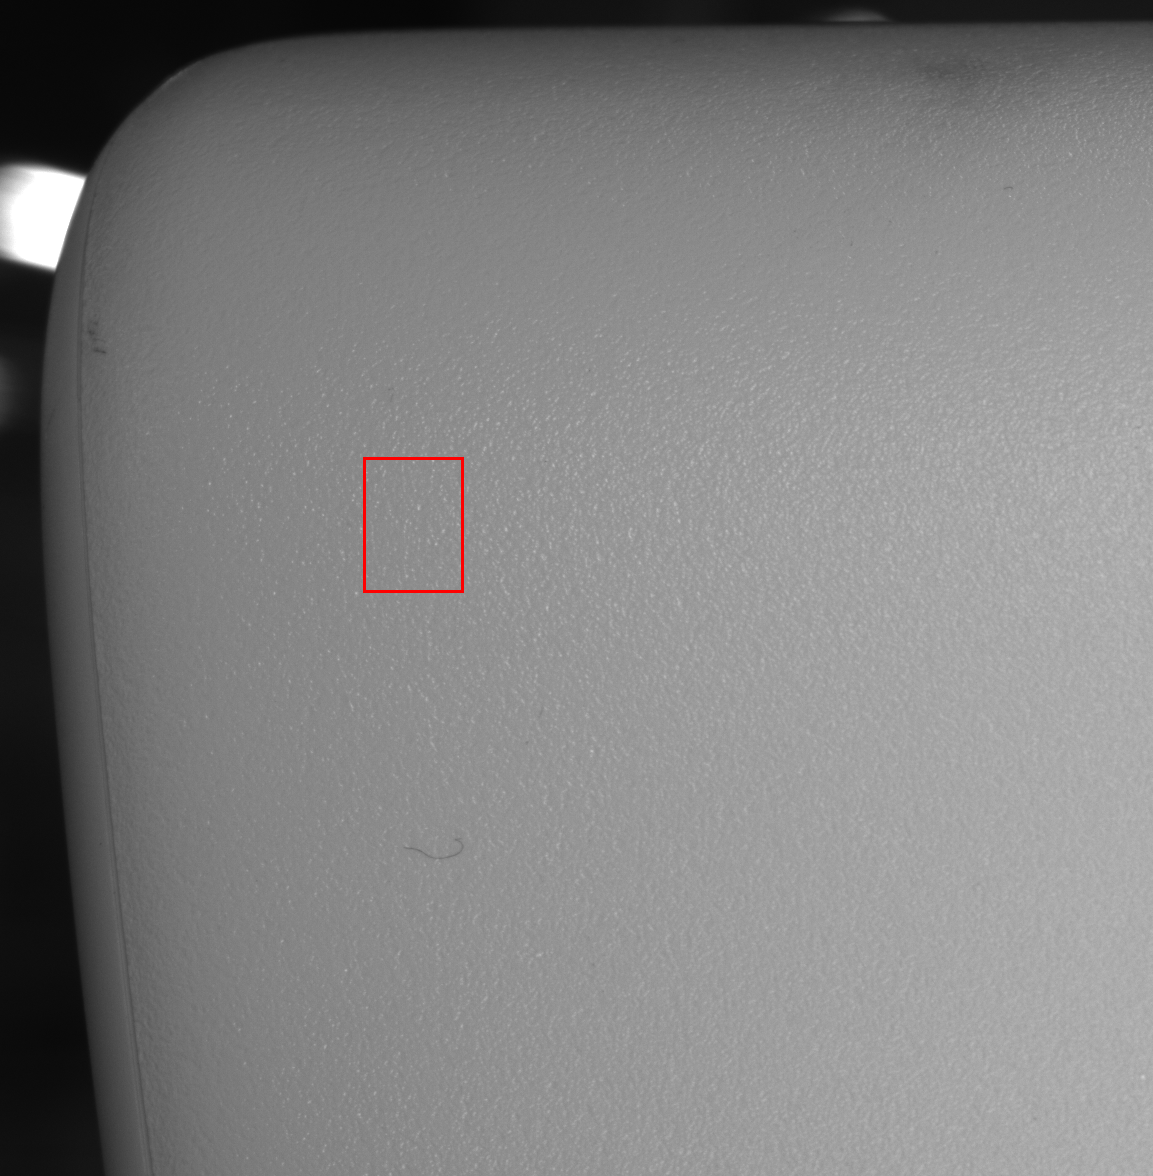

In [ ]:
button = widgets.Button(description='Render', button_style='success')
display(button)

def _get_upload_payload():
    if isinstance(uploader.value, dict) and uploader.value:
        return next(iter(uploader.value.items()))
    elif isinstance(uploader.value, tuple) and uploader.value:
        meta = uploader.value[0]
        name = meta.get('name', 'uploaded') if isinstance(meta, dict) else 'uploaded'
        return name, meta
    return None

def parse_bbox(text):
    parts = [p.strip() for p in text.split(',')]
    if len(parts) != 4:
        raise ValueError('Need four comma-separated numbers')
    return tuple(float(p) for p in parts)

def show_bbox(*args, **kwargs):
    payload = _get_upload_payload()
    if not payload:
        print('Upload an image first')
        return
    name, meta = payload
    content = meta['content'] if isinstance(meta, dict) else meta
    image = Image.open(io.BytesIO(content if isinstance(content, (bytes, bytearray)) else meta['content'])).convert('RGB')
    draw = ImageDraw.Draw(image)
    x1, y1, x2, y2 = parse_bbox(bbox_text.value)
    draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=3)
    display(image)

button.on_click(show_bbox)
